In [2]:
#!/usr/local/bin/python3
import sys
import numpy as np
import matplotlib.pyplot as plt


def main():

    double = 1  # set to 0/1 to skip/add plotting of negative r values if they are not in the data file

    if (len(sys.argv) < 2):
        print("Usage: " + sys.argv[0] + " <filename> [z_index] [max_z_value]")
        sys.exit()
    z_index = 2
    if (len(sys.argv) > 2):
        z_index = int(sys.argv[2])
    if (z_index < 2 or z_index > 5):
        z_index = 2
        print("using z_index = ", z_index)
    # get max value of z to plot, if required
    max_z = None
    if (len(sys.argv) > 3 and is_number(sys.argv[3])):  max_z = float(sys.argv[3])

    data = np.loadtxt(sys.argv[1])
    # figure out the size of grid the X-Y points
    x = set(data[:,0])  # sets only have one copy of anything, so if there are repeats, they are removed
    y = set(data[:,1])
    z = data[:,z_index]
    if ("abs" in sys.argv[2:]):
        z = np.absolute(z)  # take absolute value

    # now reshape the zvals array into the appropriate shape, and find the boundaries
    zvals = z.reshape(len(x), len(y))
    # mask 0 values to prevent from plotting
    zvals[zvals==0] = np.nan
    if (max_z != None): zvals[zvals>max_z] = np.nan

    # imshow plots columns and rows opposite to how you'd expect; so transpose them
    zvals = zvals.T

    if (double == 1 and min(x) == 0):
        # stack so we can plot the data from one half of the detector (positive r-values only)
        zvals_neg = np.fliplr(zvals)
        zvals_full = np.hstack((zvals_neg,zvals))
        bounds = (-1*max(x), max(x), min(y), max(y))
    else:
        zvals_full = zvals
        bounds = (min(x), max(x), min(y), max(y))

    # make sure that matplotlib does not have other images somehow already open
    # plt.close("all")
    # get a figure object and  the axes object associated with it
    fig = plt.figure() # (figsize=(10,5))
    # axes = plt.gca()
    # plot the image
    ip = plt.imshow(zvals_full,
                    vmax=max_z,
                    extent=bounds,   # set the boundaries of the edges of the 'image' data
                    origin="lower",  # tell matplotlib where [0,0] is in the bottom
                    cmap='jet')      # use the 'jet color map scheme, there are a bunch of options
                                     # see: https://matplotlib.org/examples/color/colormaps_reference.html
    # tell the axes what their limits are so it does not try to autoscale them
    # axes.set_xlim(bounds[:2])
    # axes.set_ylim(bounds[2:])
    # label axes
    plt.xlabel("Radial position [mm]", size=13)
    plt.ylabel("Axial position [mm]", labelpad=8,  size=13)

    # make the color legend
    cbar = plt.colorbar(ip, fraction=0.046, pad=0.04)
    label_text = ["Potential", "Field", "Radial Field", "Longitudinal Field"]
    units_text = [" [V]", " [V/cm]", " [V/cm]", " [V/cm]"]
    cbar.set_label(label_text[z_index-2] + units_text[z_index-2], size=13, labelpad=8)
    plt.title(label_text[z_index-2] + " vs. Position\n", fontsize=16, linespacing=0.4)

    plt.tight_layout()
    plt.show()


def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
    return False


#------------------------------------------------
# this code is no longer needed; replaced by pylab.loadtxt
# was:
# (positions, zvals) = read_plot_file(sys.argv[1], z_index)
# xvals = set(positions[:,0])  # sets only have one copy of anything, so if there are repeats, they are removed
# yvals = set(positions[:,1])
def read_plot_file(fname, z_index):
    input_file = open(fname)
    positions = []
    outValues = []
    # read the input file line by line
    for line in input_file:
        if '#' in line:  # skip comment lines
            continue
        if len(line) < 5:  # skip blank lines
            continue
        values = line.strip().split()
        xval = float(values[0].strip())
        yval = float(values[1].strip())
        zval = float(values[z_index].strip())
        positions.append((xval,yval))
        outValues.append(zval)
    return (np.array(positions), np.array(outValues))


if __name__ == "__main__":
    main()


ValueError: invalid literal for int() with base 10: 'C:\\Users\\Thinkpad\\AppData\\Roaming\\jupyter\\runtime\\kernel-1996e359-061e-413d-9264-d61b52b3e867.json'

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [1]:
%run plot.py E:/CDEX/ovbb/WaveSimulation/icpc_siggen-master/fields/wp_bg.dat

ValueError: cannot reshape array of size 14410601 into shape (4501,801)

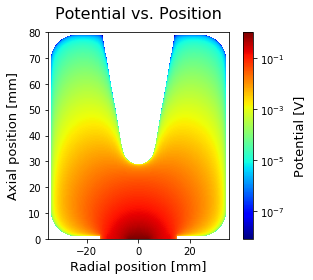

In [2]:
%run plot_log.py E:/CDEX/ovbb/WaveSimulation/icpc_siggen-master/fields/wp_example.dat

In [2]:
%run plot.py E:/CDEX/ovbb/WaveSimulation/icpc_siggen-master/fields/ev_bg.dat

ValueError: cannot reshape array of size 54015001 into shape (4501,3001)